# Calculating the longitudinal field (Bz) and False Alarm Probability (FAP)

The calculation of the longitudinal field from a Stokes V line profile is done using:

$$B_{||} = \frac{1}{g_\mathrm{eff} \lambda_{B,\mathrm{const}} \lambda_o c}\frac{\int vV(v)dv}{\int (1-I(v))dv},$$

where $I$ and $V$ are in fact $V/I_c$ and $I/I_c$, and

$$\lambda_{B,\mathrm{const}} = \frac{e}{4\pi m_e c^2} = 4.67\times 10^{-13} \mathrm{Angstrom}^{-1} \mathrm{G}^{-1}$$

Note that the `Bz` function presented here requires $\lambda_o$ to be given in nanometers.

We assume that the LSD profile passed to the function is in km/s. Thus if you would like to make a `Bz` calculation on an individual line profile on a wavelength scale, you will have to convert to km/s first. 

We also compute the False Alarm Probability (FAP) of a signal in Stokes V and the null profile, over the same velocity range used in the Bz calculation. The FAP is the p-value corresponding to the probability of getting a devitation from V=0 that results into a $\chi^2$ equal or larger to the one observed. 
* For a definitive detection, FAP < $10^{-5}$
* For a marginal detection, FAP < $10^{-3}$

## 0. Importing Necessary Packages

In [1]:
import specpolFlow as pol
import pandas as pd
import copy

loading specpolFlow package


## 1. Example with one LSD profile

To start, we first load in an LSD profile and use the built-in plotting routine to visualize the Stokes V, I, and null profile.

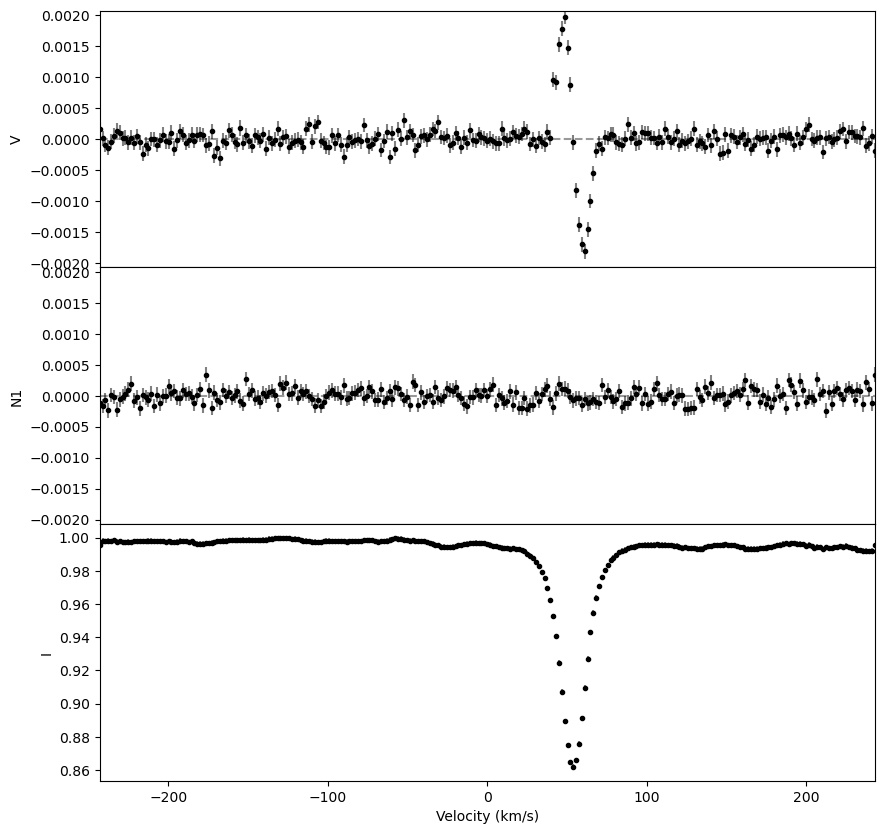

In [2]:
lsd = pol.read_lsd('CalculateBz_tutorialfiles/SampleLSD.s')
fig, ax = lsd.plot()

To calculate Bz, we simply call the `calcBz` function. In this example, we have the Bz routine display a diagnostic graph. The result is returned as a dictionary, which can be easily converted to a Pandas dataframe, which is also displayed. 

NOTE: In old LSD profiles that do not have a Null2 column, the LSD class replaces N2 with zeros (like the example above). In this case, Bz will have a RuntimeWarning. 

using AUTO method for the normalization
  using the median of the continuum outside of the line


,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,0.997030,53.359239,23.359239,83.359239,9.410500,0.880557,0.000000,-0.192054,0.863132,0.766081,0.000000,0.000000,0.000000


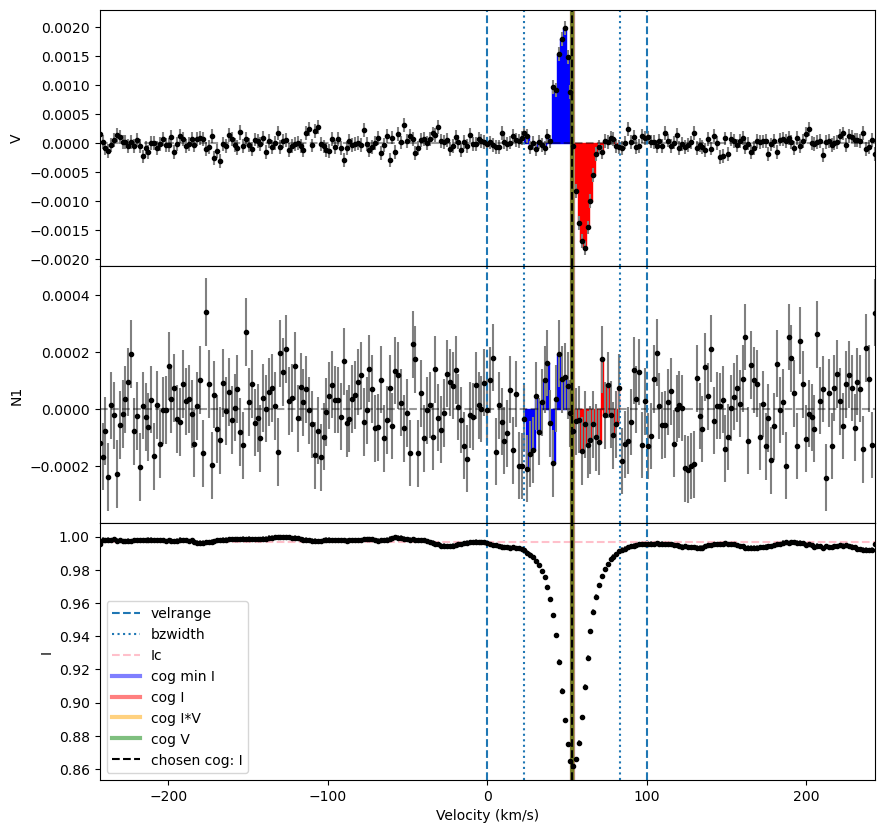

In [4]:
Bz, fig = lsd.calc_bz(norm='auto', cog='I', 
                   velrange=[0,100],bzwidth=30, 
                   geff=1.2, lambda0=5000,
                   plot=True, )    

Bz = pd.DataFrame(data=[Bz])

# simple display of the pandas dataframe
Bz.style

For more information on how to manipulate a dataframe, we recommend you look over the [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html). Below, we demonstrate how to quickly extract a particular value from the dataframe.

In [5]:
# To extract the entry for the Bz column:
print(Bz.at[0,"V bz (G)"])

# The 0 is the index of the row (there is only one row)

9.410499747294118


## 2. Looping over Bz calculations for a single result table. 

Below, we loop over a list of LSD profiles, concatenate all of the resulting Pandas dataframe rows into a single column, and add a column with the name of the stars. This process is helpful if you are want to calculate Bz for multiple stars at the same time.

In [8]:
files = ['SampleLSD.s', 'SampleLSD2.s']


for i in range(0,2):
    # loading the LSD profile
    print('### {}'.format(files[i]))
    lsd = pol.read_lsd('CalculateBz_tutorialfiles/{}'.format(files[i]))
    Bz = lsd.calc_bz(cog='I', velrange=[0,100], plot=False,
      bzwidth=30, lambda0=5000 ) 
    Bz = pd.DataFrame(data=[Bz])
    if i==0:
        Bz_table=copy.copy(Bz)
    else:
        Bz_table = pd.concat([Bz_table, Bz], ignore_index = True)
        
#Let's add a column to the table with the filename
Bz_table.insert(0, "Filename", files, True)

# You can add a row to the table with the names of the LSD profiles. 
names = ['HD1', 'HD2']
Bz_table.insert(0, "Star", names, True)

#display the table
Bz_table.style

### SampleLSD.s
using AUTO method for the normalization
  using the median of the continuum outside of the line
### SampleLSD2.s
using AUTO method for the normalization
  using the median of the continuum outside of the line


,Star,Filename,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,HD1,SampleLSD.s,0.997030,53.359239,23.359239,83.359239,9.410500,0.880557,0.000000,-0.192054,0.863132,0.766081,0.000000,0.000000,0.000000
1,HD2,SampleLSD2.s,0.995290,22.391082,-7.608918,52.391082,3.366458,2.234880,0.003250,0.693310,2.234837,0.965210,0.000000,0.000000,0.000000


To save this table as an ascii file, csv file, or whatever file is best suited to your needs please see the [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html). Below, we save the table as a csv file.

In [10]:
Bz_table.to_csv('CalculateBz_tutorialfiles/BzTable.csv')

You can access individual entries in the dataframe as shown above, but you can also extract rows and columns. Here are a few examples of this:

In [11]:
# Get the row for HD2 only:
HD2 = Bz_table[Bz_table["Star"]=='HD2']
HD2.style

,Star,Filename,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
1,HD2,SampleLSD2.s,0.995290,22.391082,-7.608918,52.391082,3.366458,2.234880,0.003250,0.693310,2.234837,0.965210,0.000000,0.000000,0.000000


In [12]:
# Get the column for the Ic and cog values
Subset = Bz_table[["Ic", "cog"]]
Subset.style

,Ic,cog
0,0.997030,53.359239
1,0.995290,22.391082


In [13]:
# turn this into a numpy array
arr = Subset.to_numpy()
print(arr)

[[ 0.99703    53.35923946]
 [ 0.99529    22.39108208]]
